# Problem Defination

Rossmann is challenging you to predict **6 weeks of daily sales** for **1,115 stores** located across Germany

## Dataset
| Field                        | Description |
|-----------------------------|-------------|
| **Id**                      | An Id that represents a (Store, Date) duple within the test set. |
| **Store**                   | A unique Id for each store. |
| **Sales**                   | The turnover for any given day (this is what you are predicting). |
| **Customers**               | The number of customers on a given day. |
| **Open**                    | Indicator for whether the store was open: `0 = closed`, `1 = open`. |
| **StateHoliday**            | Indicates a state holiday: `a = public holiday`, `b = Easter holiday`, `c = Christmas`, `0 = None`. Most stores are closed on state holidays. |
| **SchoolHoliday**           | Indicates if the (Store, Date) was affected by public school closures. |
| **StoreType**               | Differentiates between 4 different store models: `a`, `b`, `c`, `d`. |
| **Assortment**              | Describes assortment level: `a = basic`, `b = extra`, `c = extended`. |
| **CompetitionDistance**     | Distance in meters to the nearest competitor store. |
| **CompetitionOpenSinceMonth / Year** | Approximate month and year when the nearest competitor was opened. |
| **Promo**                   | Indicates whether a store is running a promo on that day. |
| **Promo2**                  | Indicates if the store is part of a continuous promotion: `0 = not participating`, `1 = participating`. |
| **Promo2SinceYear / Week**  | The year and calendar week when the store started participating in Promo2. |
| **PromoInterval**           | Months when Promo2 promotions start, e.g., `"Feb,May,Aug,Nov"` means rounds start in those months. |

# Import Libraries

In [1]:
#data Manipulation
import numpy as np
import pandas as pd
from datetime import datetime

#plotting and visualizations
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Load the dataset

In [3]:
#The training Set
df_train = pd.read_csv("../data/train.csv",sep=',', parse_dates=['Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_3896\3353393535.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../data/train.csv",sep=',', parse_dates=['Date'])


In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [15]:
df_train['Date'].min(),df_train['Date'].max(),

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [6]:
df_train.shape

(1017209, 9)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [8]:
len(df_train['Store'].unique())

1115

In [10]:
df_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
df_train.duplicated().sum()

0

Data is fairly clean with no missing values and no duplicates

In [12]:
df_train[df_train['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [28]:
closed_store = df_train[(df_train['Open'] == 0) & (df_train['SchoolHoliday'] == 0)]
len(closed_store)
print(f"Number of times the stores were closed : {len(closed_store)}")

Number of times the stores were closed : 154553


In [27]:
closed_store_no_holiday= df_train[(df_train.Open == 0) &
         (df_train.StateHoliday == "0")
         &(df_train.SchoolHoliday == 0)].count()[0]
print(f"Number of times the stores closed without having a holiday: {closed_store_no_holiday}")

Number of times the stores closed without having a holiday: 121482


After reading the descrition of the this task, Rossman clearly stated that they were undergoing refurbishments sometimes and had to close. Most probably those were the times this event was happening.

This can introduce bais to our models 

In [33]:
print(f"Percentage of closed stores for refurbishments {(closed_store_no_holiday/len(df_train)*100):.2f}%")

Percentage of closed stores for refurbishments 11.94%


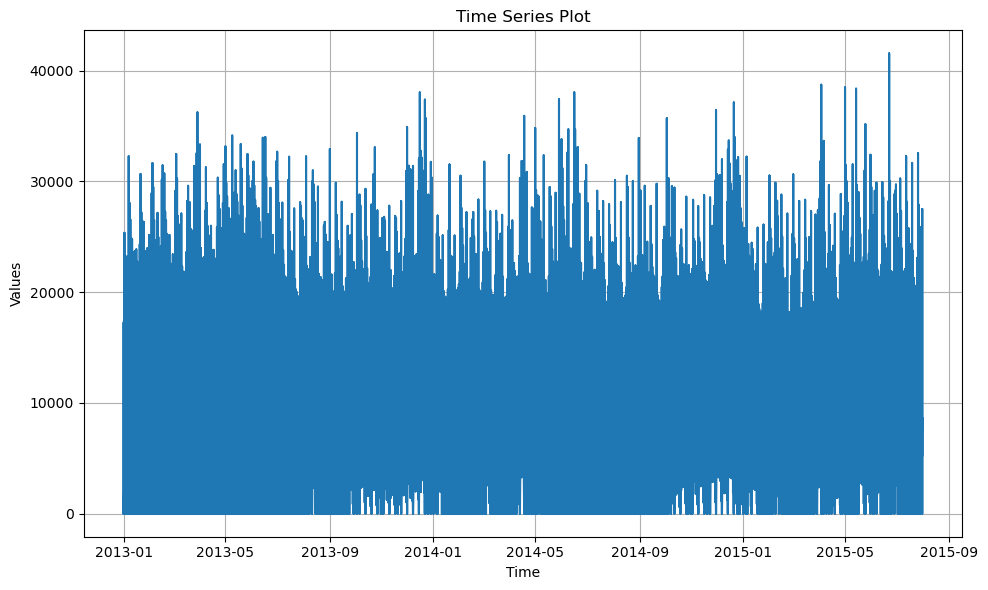

In [41]:
from src.utils import plot_time_series
plot_time_series(df_train['Date'], df_train['Sales'])